In [41]:
import matplotlib.pyplot as plt
import tensorflow as tf

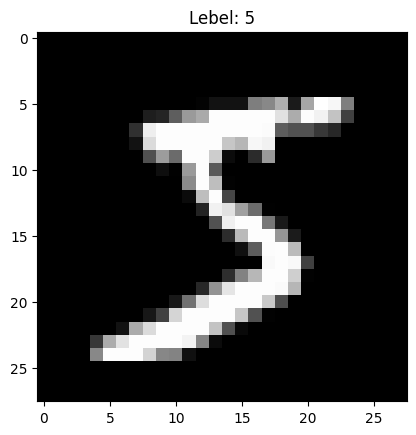

In [42]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
plt.imshow(X_train[0] , cmap="gray")
plt.title(f"Lebel: {y_train[0]}")
plt.show()

In [43]:
print(X_train[0] / 255.00)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [44]:
X_train = X_train / 255.00
X_test = X_test / 255.00


In [45]:
X_train = X_train.reshape(-1 , 28 ,28)
X_test = X_test.reshape(-1 , 28 ,28) 

In [46]:
from tensorflow.keras.utils import to_categorical

In [47]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten

In [49]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation="relu"),
    Dense(10,activation="softmax")
])

d:\PRACTICE\MLLearn\MSE\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.compile(optimizer="adam" , loss="categorical_crossentropy" , metrics=["accuracy"] )
model.fit(X_train,y_train_cat , epochs=5, validation_data=(X_test , y_test_cat))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8752 - loss: 0.4377 - val_accuracy: 0.9619 - val_loss: 0.1304
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9639 - loss: 0.1216 - val_accuracy: 0.9693 - val_loss: 0.1035
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9755 - loss: 0.0802 - val_accuracy: 0.9738 - val_loss: 0.0834
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9831 - loss: 0.0564 - val_accuracy: 0.9748 - val_loss: 0.0777
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9873 - loss: 0.0427 - val_accuracy: 0.9757 - val_loss: 0.0792


In [51]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step


In [53]:
print(classification_report(y_test, y_pred_labels))
print(confusion_matrix(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 972    0    1    1    1    0    1    1    2    1]
 [   0 1120    1    1    0    1    2    0   10    0]
 [   5    2  988    7    5    0    2   12   11    0]
 [   0    0    1  978    0    4    0    8    8   11]
 [   1    0    2    1  954   